In [4]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [12]:
data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=data.load_data()

4423680/4422102 [==============================] - 80s 18us/step


In [13]:
print(train_labels[1])

0


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

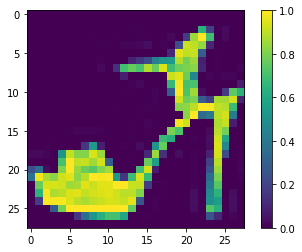

In [41]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

In [22]:
test_images = test_images / 255.0

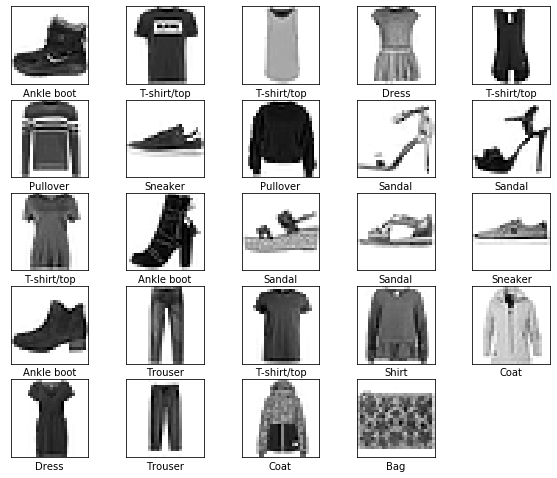

In [75]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W1028 19:07:37.265131 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1028 19:07:37.538266 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1028 19:07:37.670793 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W1028 19:07:39.602701 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1028 19:07:39.652847 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [26]:
model.fit(train_images, train_labels, epochs=10)

W1028 19:07:40.434188 139986559350592 deprecation.py:323] From /home/aman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1028 19:07:40.467570 139986559350592 deprecation_wrapper.py:119] From /home/aman/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.5005 - acc: 0.8236
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.3761 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3348 - acc: 0.8769
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3133 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2949 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2820 - acc: 0.8965
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.2660 - acc: 0.9028
Epoch 8/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.2557 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.2464 - acc: 0.9080
Epoch 10/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.2378 -

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8868


In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([2.7194997e-09, 3.5224623e-10, 1.4756512e-08, 4.8611698e-10,
       1.7611077e-08, 2.4830478e-03, 4.9065529e-10, 2.3523899e-02,
       2.5334342e-07, 9.7399276e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

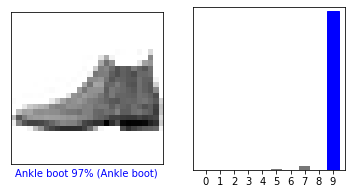

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

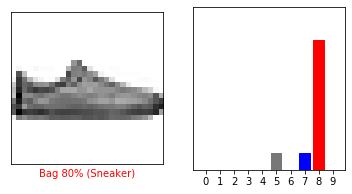

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

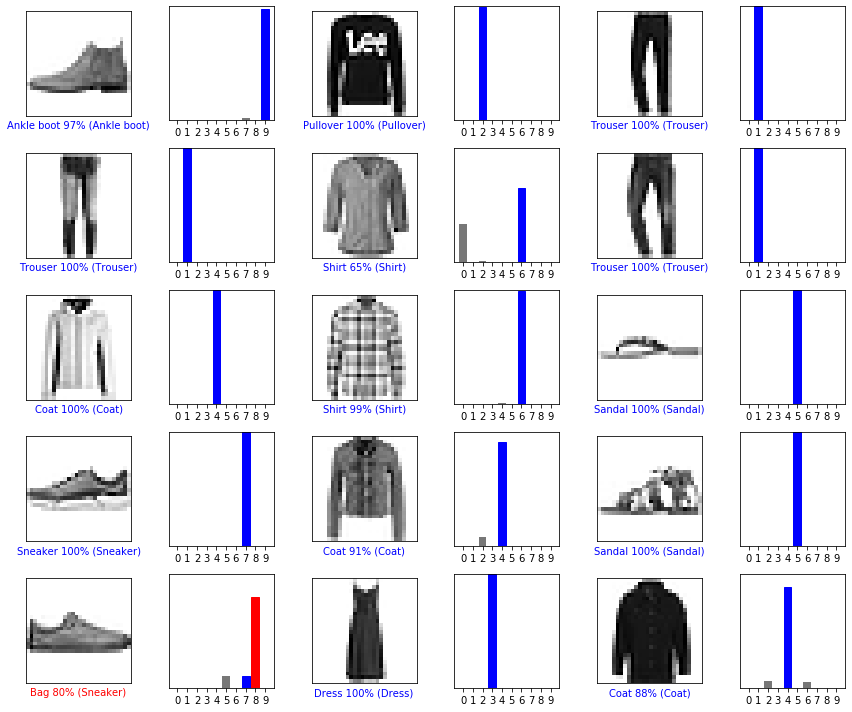

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [55]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,1))

print(img.shape)

(1, 1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.0802387e-05 3.2120695e-11 9.9625093e-01 7.4184292e-10 2.6187829e-03
  2.8032739e-11 1.0694889e-03 5.7740400e-18 9.4191419e-11 1.1034094e-16]]


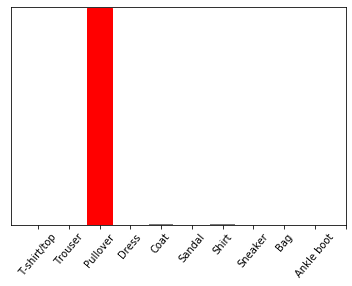

In [54]:
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(11), class_names, rotation=50)

In [40]:
np.argmax(predictions_single[0])

2

In [45]:
print(test_images[i])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.56078431 0.61176471
  0.68627451 0.81176471 0.74117647 0.63137255 0.6745098  0.66666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.05882353 0.66666667 0.61176471
  0.62745098 0.6745098  0.77254902 0.69411765 0.7254902  0.94509804
  0.04313725 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.17647059 0.75686275 0.62745098
  0.6        0.60784314 0.66666667 0.68627451 0.72156863 0.85882353
  0.2        0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [46]:
print(test_labels[i])

1


In [47]:
print(train_images[i])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.35294118 0.61176471
  0.69411765 0.71372549 0.76862745 0.69019608 0.45882353 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.         0.9372549  0.99215686 0.9372549
  0.83921569 0.88627451 0.83921569 0.90588235 0.96078431 0.97254902
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.14117647 0.94509804 0.79607843 0.85882353
  0.75294118 0.74509804 0.75686275 0.81176471 0.78431373 0.90980392
  0.52941176 0.         0.         0.00784314 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.         0.12941176 0.65490196 0.890

In [48]:
print(train_labels[i])

4
